In [5]:
from sklearn.datasets import load_iris

# Full dataset object
iris = load_iris()
print(iris.keys())   # ['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename']

# Get features (X) and labels (y) separately
X, y = load_iris(return_X_y=True)

# Return as pandas DataFrame
iris_df = load_iris(as_frame=True)
iris_df.frame.head()


dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [7]:
df= iris_df.frame

In [8]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [16]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

# Load Iris dataset
iris = load_iris()
X = iris.data       # Features
y = iris.target     # Labels
target_names = iris.target_names


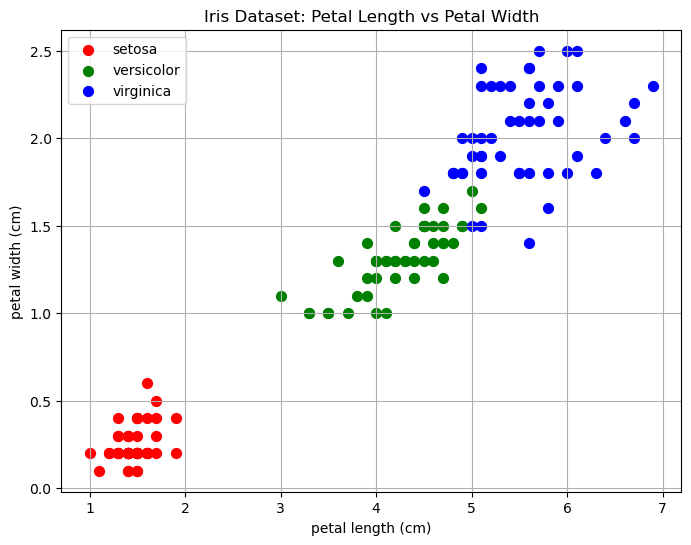

In [17]:
# Feature indices
feature_x = 2  # petal length
feature_y = 3  # petal width

# Colors for each class
colors = ['red', 'green', 'blue']

plt.figure(figsize=(8,6))

for i, target_name in enumerate(target_names):
    plt.scatter(
        X[y == i, feature_x],   # X coordinates
        X[y == i, feature_y],   # Y coordinates
        label=target_name,
        color=colors[i],
        s=50  # marker size
    )

plt.xlabel(iris.feature_names[feature_x])
plt.ylabel(iris.feature_names[feature_y])
plt.title("Iris Dataset: Petal Length vs Petal Width")
plt.legend()
plt.grid(True)
plt.show()


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report



In [36]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

knn = KNeighborsClassifier(n_neighbors=7)  # k=3

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.9666666666666667
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.89      0.94         9
           2       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30



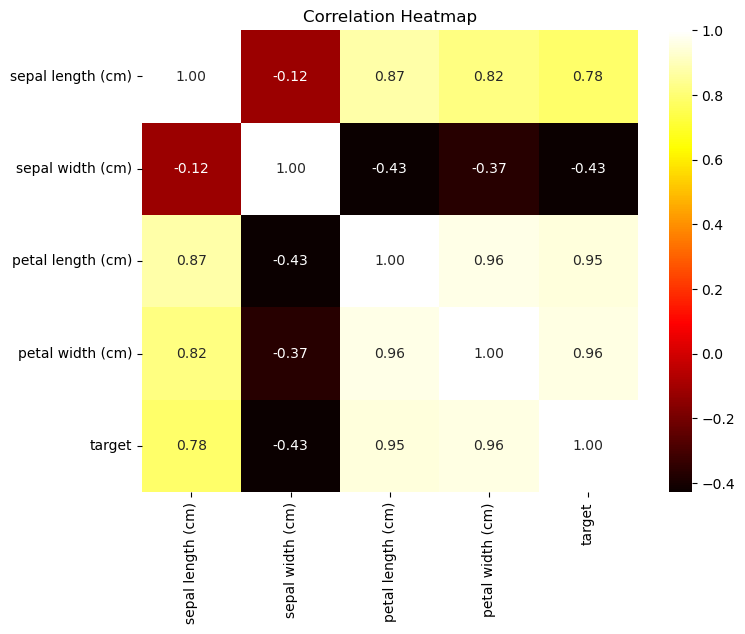

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="hot", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


C:\Users\bbuser\AppData\Local\Temp\ipykernel_21828\3281531322.py:27: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='upper right')


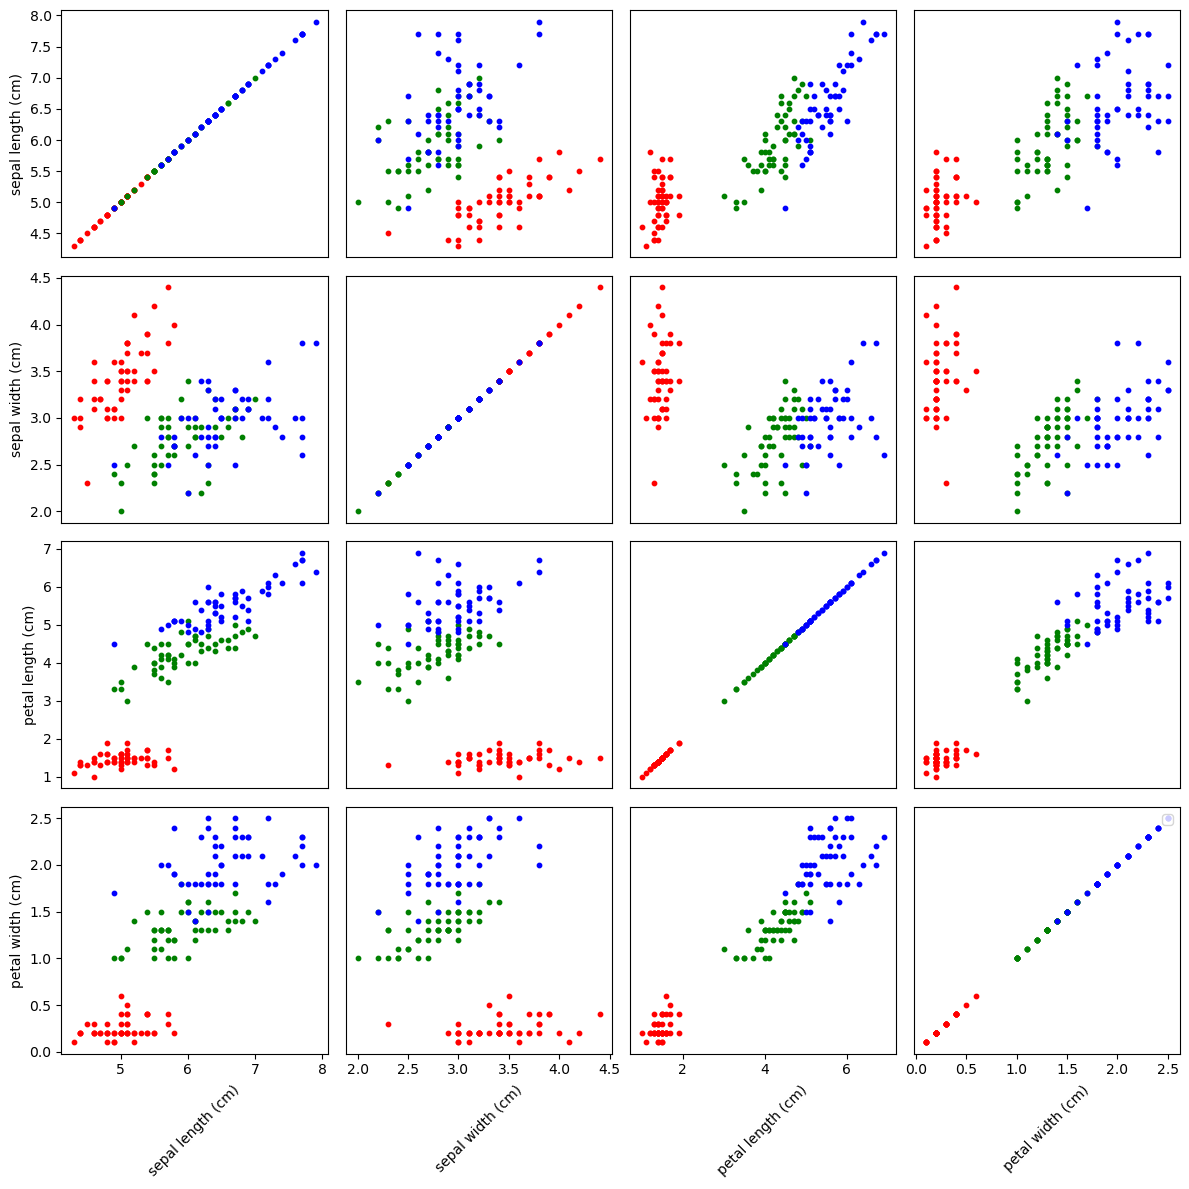

In [27]:
import itertools
import numpy as np
features = df.columns[:4]  # sepal length, sepal width, petal length, petal width

colors = {'setosa':'red', 'versicolor':'green', 'virginica':'blue'}

num_features = len(features)
plt.figure(figsize=(12,12))

for i, feat_x in enumerate(features):
    for j, feat_y in enumerate(features):
        plt_index = i*num_features + j + 1
        plt.subplot(num_features, num_features, plt_index)
        for species in iris.target_names:
            subset = df[df['species']==species]
            plt.scatter(subset[feat_y], subset[feat_x],
                        color=colors[species], s=10, label=species if i==0 and j==0 else "")
        if i == num_features-1:
            plt.xlabel(feat_y, rotation=45)
        else:
            plt.xticks([])
        if j == 0:
            plt.ylabel(feat_x)
        else:
            plt.yticks([])

plt.legend(loc='upper right')
plt.tight_layout()
plt.show()


In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

In [48]:
log_reg = LogisticRegression(max_iter=50)  # increase iterations to ensure convergence
log_reg.fit(X_train, y_train)

# Predictions
y_pred = log_reg.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



C:\Users\bbuser\AppData\Roaming\Python\Python313\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 50 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=50).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
